In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train_final13.csv',index_col = False)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,4,4,4,3,3,3,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,0,0,0,0,0,0,0,255,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = df_train["784"]

In [4]:
df_train.drop(df_train.columns[[784]], axis =1, inplace = True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,3,3,3,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,0,0,0,0,0,0,0,255,0,...,0,0,0,0,0,0,0,0,0,0


# Creating CNN module

In [79]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
labels = np.array(labels)

In [6]:
labels = np.array(labels)


[ 0  0  0 ... 18 18 18]


In [7]:

import tensorflow as tf
cat = tf.keras.utils.to_categorical(labels, num_classes = 19)
images = []
for i in range(183823): 
    images.append(np.array(df_train[i:i +1]).reshape(45,45,1))
    
np.random.seed(7)

In [82]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3),activation ='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(137,activation = 'relu'))  
model.add(Dense(72,activation = 'relu')) 
model.add(Dense(19,activation = 'softmax')) # changed 13 to 20

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 137)              

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [3]:

history = model.fit(np.array(images), cat, shuffle = True , epochs = 15, validation_split = 0.2)
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model26/my_model26')


Text(0, 0.5, 'Accuracy')

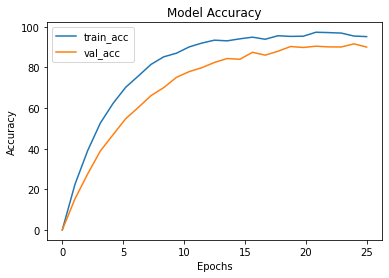

In [77]:
import matplotlib.pyplot as plt

plt.plot(Accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_acc','val_acc'], loc='upper left')
plt.show()
